<a href="https://colab.research.google.com/github/PercyMayaba/codepipeline-s3-game/blob/main/CreditCardAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 102k/102k [00:00<00:00, 31.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [ ]:
import os

# List files in the downloaded directory
print(os.listdir(path))

['bank_transactions_data_2.csv']


In [ ]:
# Assuming the path variable from the previous cell holds the directory where the dataset is downloaded
file_path = path + '/bank_transactions_data_2.csv'
df = pd.read_csv(file_path)

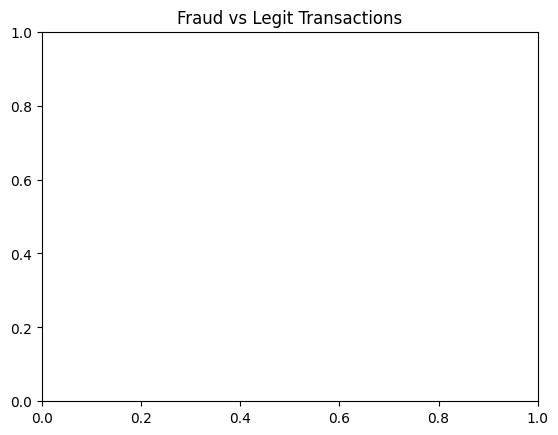

In [ ]:
#Class imbalance visualization sns.countplot(x='Class', data=df)
plt.title('Fraud vs Legit Transactions')
plt.show()

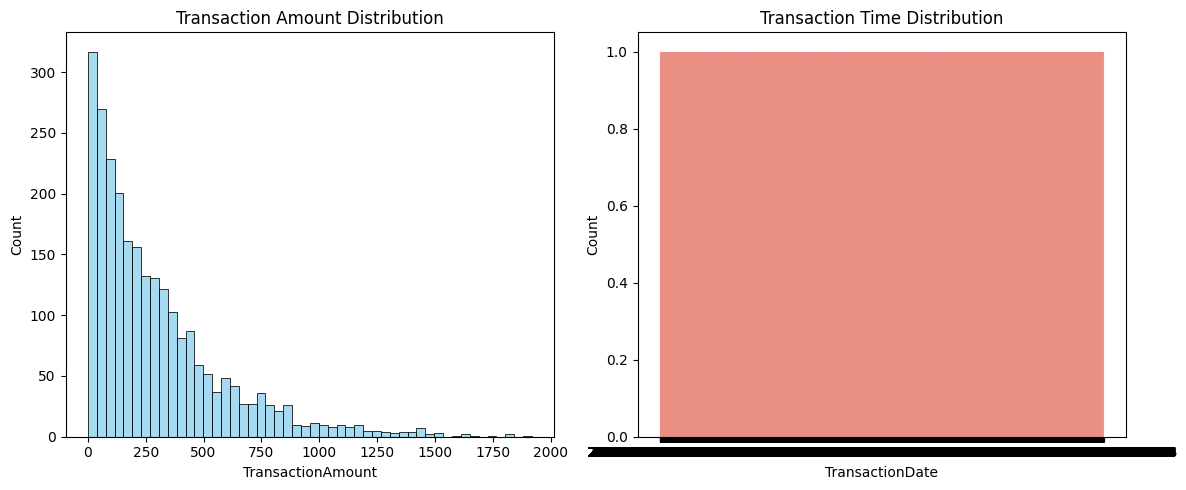

In [ ]:
#Feature Distribution (Amount and Time)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['TransactionAmount'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Transaction Amount Distribution')
sns.histplot(df['TransactionDate'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Transaction Time Distribution')
plt.tight_layout()
plt.show()

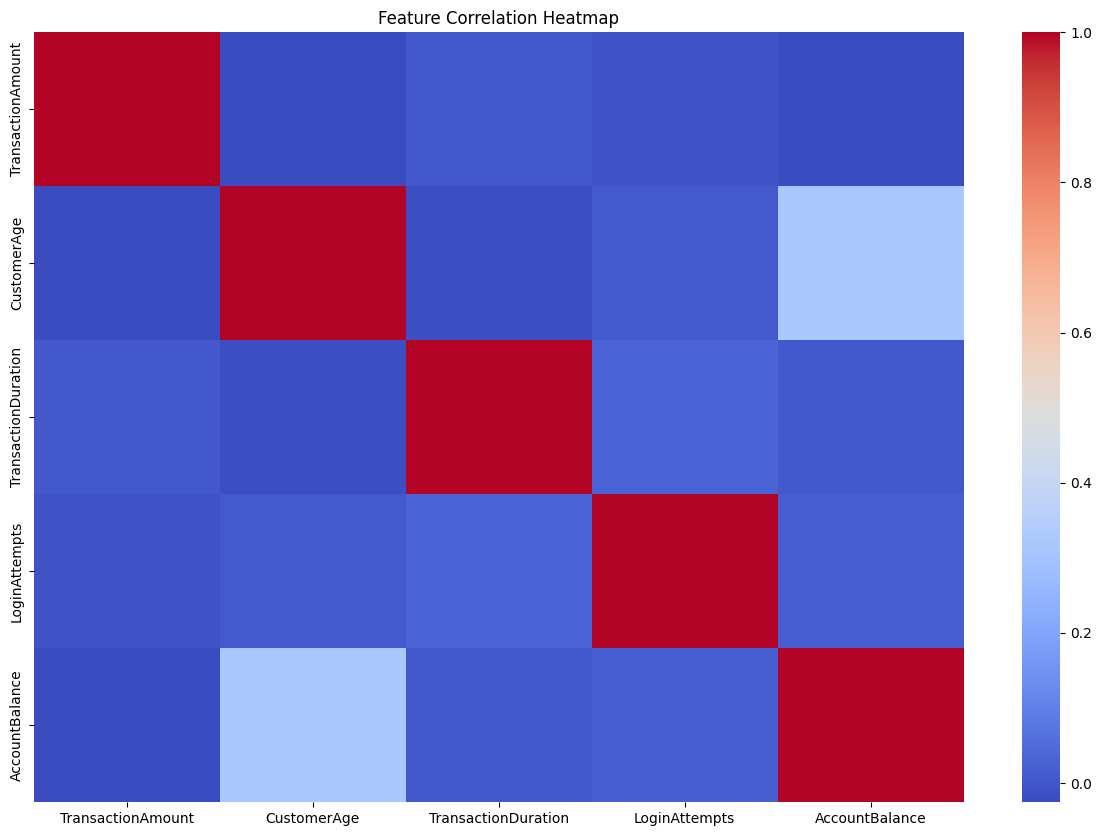

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(15, 10))

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# One-hot encode 'TransactionType'
df = pd.get_dummies(df, columns=['TransactionType'], prefix='TransactionType')

# Display the first few rows to show the changes
display(df.head())

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,False,True
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,False,True
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,True,False


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

None

In [ ]:
import pandas as pd
import os

# Assuming the path variable from the previous cell holds the directory where the dataset is downloaded
path = '/root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4'
file_path = path + '/bank_transactions_data_2.csv'
df = pd.read_csv(file_path)

In [ ]:
display(df.head())

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
# Preprocessing
scaler = StandardScaler()
df['TransactionAmount'] = scaler.fit_transform(df[['TransactionAmount']])

# --- Temporary: Create a dummy target variable to enable data splitting ---
# In a real scenario, you would define your target variable based on actual fraud labels
# or rules derived from domain knowledge.
df['IsFraud_dummy'] = np.random.randint(0, 2, size=len(df)) # Replace with your actual target variable definition
target_column = 'IsFraud_dummy' # Replace with the name of your actual target variable column
# -----------------------------------------------------------------------


# Define your target variable
X = df.drop([target_column, 'TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'TransactionType'], axis=1, errors='ignore') # Drop target and non-numeric/identifier columns
y = df[target_column] # Assign the target variable


# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Data splitting complete. X_train, X_test, y_train, y_test are now defined.")

Data splitting complete. X_train, X_test, y_train, y_test are now defined.


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Check your Streamlit Authenticator setup
import streamlit_authenticator as stauth

# The credentials are usually in your code or a config file
credentials = {
    "usernames": {
        "your_username": {
            "email": "your@email.com",
            "name": "Your Name",
            "password": "hashed_password_here"
        }
    }
}

2025-10-25 13:26:39.890 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-25 13:26:40.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 13:26:40.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 13:26:40.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 13:26:40.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!pip install streamlit_authenticator --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.2 MB/s eta 0:00:00


## Run the Streamlit App

To run the Streamlit application, execute the following command in your Colab environment:

In [ ]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'sample_data']


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠏⠋⠙⠹⠸⠼your url is: https://neat-ideas-create.loca.lt


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

st.title('Fraud Transaction Prediction')

st.write("""
This dashboard predicts whether a transaction is fraudulent based on the provided features.
""")

# Add input fields for the features
st.sidebar.header('Transaction Details')

def user_input_features():
    transaction_amount = st.sidebar.number_input('Transaction Amount', value=0.0)
    customer_age = st.sidebar.slider('Customer Age', 18, 100, 30)
    transaction_duration = st.sidebar.number_input('Transaction Duration (seconds)', value=0)
    login_attempts = st.sidebar.number_input('Login Attempts', value=1)
    account_balance = st.sidebar.number_input('Account Balance', value=0.0)

    data = {'TransactionAmount': transaction_amount,
            'CustomerAge': customer_age,
            'TransactionDuration': transaction_duration,
            'LoginAttempts': login_attempts,
            'AccountBalance': account_balance}
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

st.subheader('User Input Features')
st.write(input_df)

# Note: The model loading, scaling, and prediction parts are commented out for now
# as the focus is on creating the basic Streamlit app structure and imports.
# These will be added in subsequent steps.

# # Load the trained model (assuming you saved it as model.pkl)
# # try:
# #     with open('model.pkl', 'rb') as f:
# #         model = pickle.load(f)
# # except FileNotFoundError:
# #     st.error("Model file not found. Please ensure 'model.pkl' is in the same directory.")
# #     st.stop()

# # Load the scaler (assuming you saved it as scaler.pkl)
# # try:
# #     with open('scaler.pkl', 'rb') as f:
# #         scaler = pickle.load(f)
# # except FileNotFoundError:
# #     st.error("Scaler file not found. Please ensure 'scaler.pkl' is in the same directory.")
# #     st.stop()

# # Scale the input features
# # scaled_input = scaler.transform(input_df)

# # Make prediction
# # prediction = model.predict(scaled_input)
# # prediction_proba = model.predict_proba(scaled_input)

# # st.subheader('Prediction')
# # if prediction[0] == 1:
# #     st.write('**Fraudulent Transaction**')
# # else:
# #     st.write('**Legit Transaction**')

# # st.subheader('Prediction Probability')
# # st.write(f"Legit: {prediction_proba[0][0]:.2f}")
# # st.write(f"Fraud: {prediction_proba[0][1]:.2f}")

In [ ]:
!pip install streamlit --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.1 MB/s eta 0:00:00


In [ ]:
!npm install -g localtunnel@2.0.2

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 2s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [ ]:
!cat app.py

In [ ]:
print("✅ Fraud detection pipeline complete.")
print("\nNext steps could include:")
print("- Trying other models (XGBoost, Logistic Regression)")
print("- Handling imbalance with SMOTE or undersampling")
print("- Deploying via Flask or Streamlit for live fraud detection")

In [ ]:
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_score):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Create a streamlit app

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

st.title('Fraud Transaction Prediction')

# Load the trained model (assuming you saved it as model.pkl)
# try:
#     with open('model.pkl', 'rb') as f:
#         model = pickle.load(f)
# except FileNotFoundError:
#     st.error("Model file not found. Please ensure 'model.pkl' is in the same directory.")
#     st.stop()

# Load the scaler (assuming you saved it as scaler.pkl)
# try:
#     with open('scaler.pkl', 'rb') as f:
#         scaler = pickle.load(f)
# except FileNotFoundError:
#     st.error("Scaler file not found. Please ensure 'scaler.pkl' is in the same directory.")
#     st.stop()


st.write("""
This dashboard predicts whether a transaction is fraudulent based on the provided features.
""")

# Add input fields for the features
st.sidebar.header('Transaction Details')

def user_input_features():
    transaction_amount = st.sidebar.number_input('Transaction Amount', value=0.0)
    customer_age = st.sidebar.slider('Customer Age', 18, 100, 30)
    transaction_duration = st.sidebar.number_input('Transaction Duration (seconds)', value=0)
    login_attempts = st.sidebar.number_input('Login Attempts', value=1)
    account_balance = st.sidebar.number_input('Account Balance', value=0.0)

    data = {'TransactionAmount': transaction_amount,
            'CustomerAge': customer_age,
            'TransactionDuration': transaction_duration,
            'LoginAttempts': login_attempts,
            'AccountBalance': account_balance}
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

st.subheader('User Input Features')
st.write(input_df)

# Note: The model loading, scaling, and prediction parts are commented out for now
# as the focus is on creating the basic Streamlit app structure and imports.
# These will be added in subsequent steps.

# # Scale the input features
# scaled_input = scaler.transform(input_df)

# # Make prediction
# prediction = model.predict(scaled_input)
# prediction_proba = model.predict_proba(scaled_input)

# st.subheader('Prediction')
# if prediction[0] == 1:
#     st.write('**Fraudulent Transaction**')
# else:
#     st.write('**Legit Transaction**')

# st.subheader('Prediction Probability')
# st.write(f"Legit: {prediction_proba[0][0]:.2f}")
# st.write(f"Fraud: {prediction_proba[0][1]:.2f}")

In [ ]:
import pickle

# Save the trained model and scaler
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Uncomment code in app.py to load the model and scaler
with open('app.py', 'r') as f:
    lines = f.readlines()

with open('app.py', 'w') as f:
    for line in lines:
        if line.strip() in ['# try:', '# with open(\'model.pkl\', \'rb\') as f:', '# model = pickle.load(f)', '# except FileNotFoundError:', '# st.error("Model file not found. Please ensure \'model.pkl\' is in the same directory.")', '# st.stop()', '# Load the scaler (assuming you saved it as scaler.pkl)', '# try:', '# with open(\'scaler.pkl\', \'rb\') as f:', '# scaler = pickle.load(f)', '# except FileNotFoundError:', '# st.error("Scaler file not found. Please ensure \'scaler.pkl\' is in the same directory.")', '# st.stop()']:
            f.write(line.replace('# ', ''))
        else:
            f.write(line)

In [ ]:
with open('app.py', 'r') as f:
    lines = f.readlines()

with open('app.py', 'w') as f:
    for line in lines:
        if line.strip() in ['# scaled_input = scaler.transform(input_df)', '# Make prediction', '# prediction = model.predict(scaled_input)', '# prediction_proba = model.predict_proba(scaled_input)']:
            f.write(line.replace('# ', ''))
        else:
            f.write(line)

In [ ]:
with open('app.py', 'r') as f:
    lines = f.readlines()

with open('app.py', 'w') as f:
    for line in lines:
        if line.strip() in ["# st.subheader('Prediction')", "# if prediction[0] == 1:", "# st.write('**Fraudulent Transaction**')", "# else:", "# st.write('**Legit Transaction**')", "# st.subheader('Prediction Probability')", "# st.write(f\"Legit: {prediction_proba[0][0]:.2f}\")", "# st.write(f\"Fraud: {prediction_proba[0][1]:.2f}\")"]:
            f.write(line.replace('# ', ''))
        else:
            f.write(line)